### Project: Create a neural network class

---

Based on previous code examples, develop a neural network class that is able to classify any dataset provided. The class should create objects based on the desired network architecture:

1. Number of inputs
2. Number of hidden layers
3. Number of neurons per layer
4. Number of outputs
5. Learning rate

The class must have the train, and predict functions.

Test the neural network class on the datasets provided below: Use the input data to train the network, and then pass new inputs to predict on. Print the expected label and the predicted label for the input you used. Print the accuracy of the training after predicting on different inputs.

Use matplotlib to plot the error that the train method generates.

**Don't forget to install Keras and tensorflow in your environment!**

---

### Import the needed Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Needed for the mnist data
from keras.datasets import mnist
from keras.utils import to_categorical 

Using TensorFlow backend.


### Define the class

In [2]:
class NeuralNetwork:

    def __init__(self, architecture, alpha):
        '''
            layers: List of integers which represents the architecture of the network.
            alpha:  Learning rate.
        '''
        #np.random.seed(42)
        self.architecture = architecture
        i, l, nodes, o = architecture
        # Alpha and layers
        self.alpha = alpha
        self.layers = l
        self.nodes = nodes
        #self.layers = layers
        #self.inputs = inputs
        # Bias
        self.b1 = np.random.randn(nodes)
        self.b = np.random.randn(l - 1, nodes)
        self.b2 = np.random.randn(o)
        # Weights
        self.w1 = np.random.randn(i, nodes)
        self.ws = np.zeros((l - 1, nodes, nodes))
        for i in range(l - 1):
            self.ws[i] = np.random.randn(nodes,nodes)
        self.w2 = np.random.randn(nodes,o)
        # TODO: Initialize the list of weights matrices, then store
        # the network architecture ad learning rate
        #self.outputs = output
        #self.alpha = alpha
        pass
    
            
    def __repr__(self): 
        # construct and return a string that represents the network 
        # architecture 
        return "NeuralNetwork: {}".format( "-".join(str(l) for l in self.layers))

    def softmax(self, X):  
        # applies the softmax function to a set of values
        expX = np.exp(X)
        return expX / expX.sum(axis=1, keepdims=True)
        
    def sigmoid(self, x):
        # the sigmoid for a given input value
        return 1.0 / (1.0 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        # the derivative of the sigmoid
        return x * (1 - x)
    
    def predict(self, inputs):
        # TODO: Define the predict function
        # First input
        l0 = inputs
        levels = np.zeros((self.layers,inputs.shape[0],self.nodes))
        levels[0] = self.sigmoid(np.dot(l0,self.w1)+self.b1)
        # Rest of layers
        for i in range(1, self.layers):
            levels[i] = self.sigmoid(np.dot(levels[i-1],self.ws[i-1])+self.b[i-1])
        # Last layer
        p = self.softmax(np.dot(levels[len(levels)-1], self.w2)+self.b2)
        return p,levels
        
    def train(self, inputs, labels, epochs = 1000, displayUpdate = 100):
        # TODO: Define the training step for the network. It should include the forward and back propagation
        # steps, the updating of the weights, and it should print the error every 'displayUpdate' epochs
        # It must return the errors so that they can be displayed with matplotlib
        errors = []
        for i in range(epochs):
            # Predict
            p, levels = self.predict(inputs)
            # First layer (last) prediction and error
            l0 = inputs#inputs
            ol = levels[len(levels)-1]
            il = p
            # Error
            error = labels-p
            errors.append(np.average(np.abs(error)))
            #Deltas
            delta = error * self.sigmoid_deriv(p)
            b_delta = np.sum(delta)
            self.b2 += b_delta * self.alpha#3
            #for j in range(x, -1, -1):
                #self.ws[j] += np.dot(levels[j].T, d)
                #self.bias[j] += np.sum(d) * self.alpha
                #e = np.dot(d, self.ws[j].T)
                #d = e * self.sigmoid_deriv(levels[j])
                #pass
            # output
            error = np.dot(delta, self.w2.T)
            self.w2 += np.dot(ol.T,delta)*self.alpha
            delta = error * self.sigmoid_deriv(ol)
            # rest of layers
            for i in range(self.layers-1):
                b_delta = np.sum(delta)
                self.b[len(self.b)-i-1] += b_delta * self.alpha 
                error = np.dot(delta, self.ws[len(self.ws)-i-1])
                self.ws[len(self.ws)-i-1] += np.dot(levels[len(levels)-i-2].T,delta)*self.alpha
                delta = error * self.sigmoid_deriv(levels[len(levels)-i-2])
            # Last propagation
            b_delta = np.sum(delta)
            self.b1+= b_delta * self.alpha
            self.w1 += np.dot(l0.T,delta)*self.alpha
            # Print error
            if(i % displayUpdate is 0):
                print("Error:", np.mean(np.abs(errors)))
        return errors

### Test datasets

#### XOR

In [3]:
# input dataset
XOR_inputs = np.array([  
                [0,0],
                [0,1],
                [1,0],
                [1,1]
            ])

# labels dataset            
XOR_labels = np.array([[0,1,1,0]]).T
classes_labels = np.array([0]*2 + [1]*2)
classes_one_hot_labels = np.zeros((4, 2))
for i in range(4):  
    classes_one_hot_labels[i, XOR_labels[i]] = 1

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


Error: 0.4991690443384628
Error: 0.33100844762083204
Error: 0.1983008272395436
Error: 0.14508637847893682
Error: 0.11620062074201731
Error: 0.09789171286404767
Error: 0.08516317722021405
Error: 0.0757542606243
Error: 0.06848846824272656
Error: 0.06269101113370602
[[0.98945491 0.01054509]
 [0.01477731 0.98522269]
 [0.0160602  0.9839398 ]
 [0.98245466 0.01754534]]


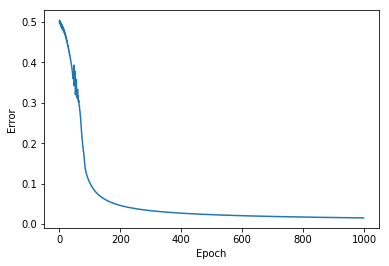

In [4]:
#TODO: Test the class with the XOR data
i=2
h_l = 1
n = 4
o = 2
architecture = i, h_l, n, o
network = NeuralNetwork(architecture, alpha = 5)
errors = network.train(XOR_inputs,classes_one_hot_labels)
print(network.predict(XOR_inputs)[0])

f, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.plot(errors)

#### Multiple classes

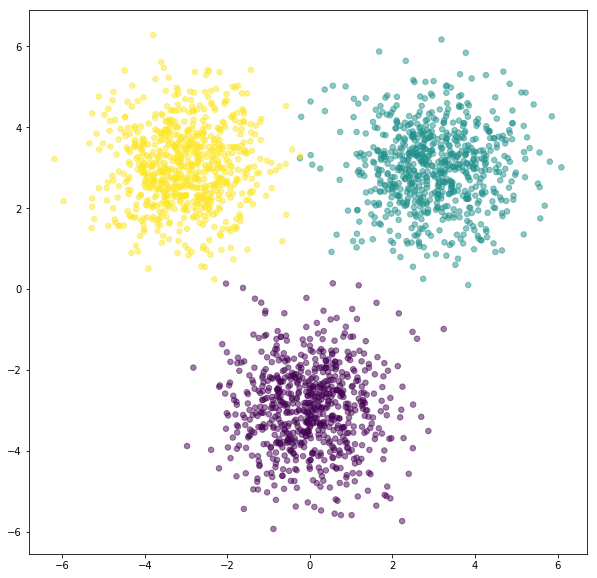

In [5]:
# Creates the data points for each class
class_1 = np.random.randn(700, 2) + np.array([0, -3])  
class_2 = np.random.randn(700, 2) + np.array([3, 3])  
class_3 = np.random.randn(700, 2) + np.array([-3, 3])

feature_set = np.vstack([class_1, class_2, class_3])

labels = np.array([0]*700 + [1]*700 + [2]*700)

one_hot_labels = np.zeros((2100, 3))

for i in range(2100):  
    one_hot_labels[i, labels[i]] = 1

plt.figure(figsize=(10,10))  
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, s=30, alpha=0.5)  
plt.show()

Error: 0.354431425883837
Error: 0.0509592118791731
Error: 0.036754008102532584
Error: 0.030308372324208785
Error: 0.026328967706690912
Error: 0.023556430489429004
Error: 0.021485961181483177
Error: 0.019865640191844388
Error: 0.018553981674266397
Error: 0.017464716514730364
[[0.00371569 0.00683339 0.98945091]]


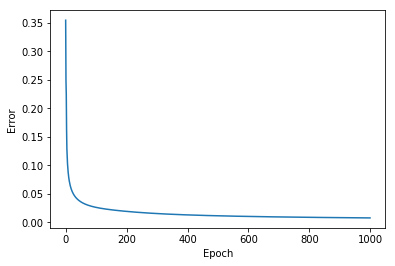

In [6]:
#TODO: Test the class with the multiple classes data
architecture = 2, 1, 3, 3
network = NeuralNetwork(architecture, alpha = 0.01)
errors = network.train(feature_set,one_hot_labels)

test = np.array([[-2,2]])
print(network.predict(test)[0])

f, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.plot(errors)

#### On the mnist data set

---
Train the network to classify hand drawn digits.

For this data set, if the training step is taking too long, you can try to adjust the architecture of the network to have fewer layers, or you could try to train it with fewer input. The data has already been loaded and preprocesed so that it can be used with the network.

---

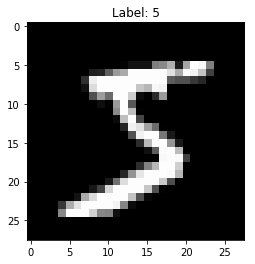

In [7]:
# Load the train and test data from the mnist data set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Plot a sample data point
plt.title("Label: " + str(train_labels[0]))
plt.imshow(train_images[0], cmap="gray")

In [8]:
# Standardize the data

# Flatten the images
train_images = train_images.reshape((60000, 28 * 28))
# turn values from 0-255 to 0-1
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# Create one hot encoding for the labels
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

Error: 0.18150041183153068
Error: 0.1797173819661161
Error: 0.18056000442883754
Error: 0.18006899426874703
Error: 0.17954967972233526
Error: 0.1789463910769115
Error: 0.17834504303741586
Error: 0.17767150443564148
Error: 0.1770901134172613
Error: 0.17643575892750712
Error: 0.17601131849746812
Error: 0.17554076055032372
Error: 0.1752299774276777
Error: 0.17501087679132793
Error: 0.17477290022246025
Error: 0.17460213702360697
Error: 0.17452009834828755
Error: 0.17453832965717633
Error: 0.17462782181412032
Error: 0.17458196682182675
Error: 0.17460771879576756
Error: 0.17484836173961923
Error: 0.17493460525903942
Error: 0.17499501959343822
Error: 0.175133593949841
Error: 0.17520786744295097
Error: 0.17535294550625938
Error: 0.17542652387051152
Error: 0.17550757096166147
Error: 0.17562145156316908
Error: 0.1758224214006259
Error: 0.17598294488808
Error: 0.17608070096499584
Error: 0.1761188695324278
Error: 0.17628440983698868
Error: 0.1763990733773875
Error: 0.17658241528554713
Error: 0.1766

Error: 0.1797486679317971
Error: 0.17975102706750098
Error: 0.17975337103191416
Error: 0.17975569997091445
Error: 0.17975801402851535
Error: 0.17976031334689588
Error: 0.17976259806642955
Error: 0.179764868325713
Error: 0.17976712426159402
Error: 0.17976936600919907
Error: 0.17977159370196022
Error: 0.1797738074716416
Error: 0.17977600744836544
Error: 0.1797781937606376
Error: 0.17978036653537247
Error: 0.17978252589791763
Error: 0.17978467197207787
Error: 0.17978680488013898
Error: 0.17978892474289085
Error: 0.17979103167965033
Error: 0.1797931258082836
Error: 0.1797952072452282
Error: 0.17979727610551452
Error: 0.17979933250278707
Error: 0.17980137654932524
Error: 0.1798034083560638
Error: 0.17980542803261285
Error: 0.17980743568727772
Error: 0.1798094314270781
Error: 0.17981141535776718
Error: 0.17981338758385046
Error: 0.17981534820860387
Error: 0.17981729733409182
Error: 0.1798192350611851
Error: 0.17982116148957816
Error: 0.17982307671780615
Error: 0.1798249808432618
Error: 0.179

Error: 0.1801131467385151
Error: 0.18011374131430358
Error: 0.18011433396589857
Error: 0.1801149247026257
Error: 0.1801155135337505
Error: 0.18011610046847876
Error: 0.18011668551595708
Error: 0.18011726868527336
Error: 0.1801178499854572
Error: 0.1801184294254805
Error: 0.18011900701425768
Error: 0.18011958276064644
Error: 0.18012015667344794
Error: 0.18012072876140747
Error: 0.18012129903321478
Error: 0.18012186749750445
Error: 0.1801224341628565
Error: 0.1801229990377967
Error: 0.180123562130797
Error: 0.1801241234502761
Error: 0.18012468300459955
Error: 0.18012524080208053
Error: 0.18012579685098012
Error: 0.1801263511595075
Error: 0.1801269037358208
Error: 0.180127454588027
Error: 0.18012800372418272
Error: 0.18012855115229442
Error: 0.18012909688031878
Error: 0.18012964091616326
Error: 0.18013018326768623
Error: 0.18013072394269755
Error: 0.18013126294895881
Error: 0.18013180029418385
Error: 0.18013233598603892
Error: 0.18013287003214332
Error: 0.1801334024400695
Error: 0.1801339

Error: 0.18023622264393238
Error: 0.18023648533504885
Error: 0.1802367474606301
Error: 0.18023700902250037
Error: 0.1802372700224762
Error: 0.18023753046236624
Error: 0.18023779034397144
Error: 0.18023804966908494
Error: 0.18023830843949235
Error: 0.18023856665697152
Error: 0.18023882432329277
Error: 0.1802390814402189
Error: 0.18023933800950517
Error: 0.1802395940328993
Error: 0.1802398495121417
Error: 0.18024010444896532
Error: 0.18024035884509582
Error: 0.18024061270225142
Error: 0.18024086602214323
Error: 0.180241118806475
Error: 0.18024137105694332
Error: 0.1802416227752377
Error: 0.1802418739630404
Error: 0.18024212462202668
Error: 0.1802423747538647
Error: 0.18024262436021568
Error: 0.18024287344273385
Error: 0.18024312200306639
Error: 0.18024337004285376
Error: 0.18024361756372945
Error: 0.18024386456732008
Error: 0.18024411105524565
Error: 0.18024435702911923
Error: 0.18024460249054725
Error: 0.1802448474411294
Error: 0.18024509188245877
Error: 0.18024533581612187
Error: 0.180

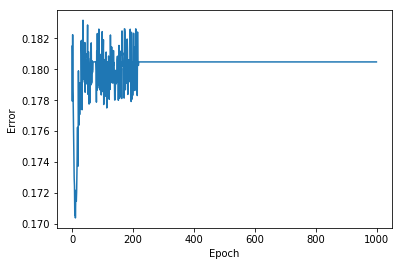

In [9]:
# TODO: Test the class with the mnist data. Test the training of the network with the test_images data, and 
# record the accuracy of the classification.
architecture = 784, 2, 64, 10
network = NeuralNetwork(architecture, alpha =  0.001)
errors = network.train(train_images[0:5000],train_labels[0:5000])

f, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.plot(errors)

Error: 0.1854311596798641
Error: 0.1825789860252418
Error: 0.18135912712426436
Error: 0.18052700454468695
Error: 0.17993638727601574
Error: 0.17944847557387997
Error: 0.17904898870446528
Error: 0.17868009220106335
Error: 0.17839157218820534
Error: 0.17802579526447532
Error: 0.17796072039040253
Error: 0.17752325856250706
Error: 0.177649849245008
Error: 0.1778146421898927
Error: 0.17784587356601914
Error: 0.1777953262168479
Error: 0.1774636086770301
Error: 0.1775997228654483
Error: 0.17772755444859553
Error: 0.17771810733963123
Error: 0.17796438047158167
Error: 0.17786927153900825
Error: 0.17764410728656868
Error: 0.17782422626422992
Error: 0.17783407707401214
Error: 0.1779274606890375
Error: 0.17805185847704427
Error: 0.17807396979731452
Error: 0.17802720205261977
Error: 0.17790468577312005
Error: 0.17803501893864296
Error: 0.1781750504493599
Error: 0.17820484814236678
Error: 0.17822215204026187
Error: 0.17830884240503753
Error: 0.1782994674923084
Error: 0.17820741864607068
Error: 0.178

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan

Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan
Error: nan


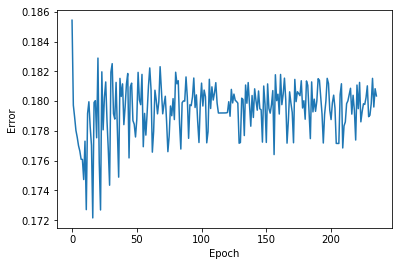

In [10]:
# Testing data Test the training of the network with the test_images data
network2 = NeuralNetwork(architecture, alpha =  0.001)
errors = network2.train(test_images[0:5000],test_labels[0:5000])
f, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')
ax.plot(errors)

After predicting on the *test_images*, use matplotlib to display some of the images that were not correctly classified. Then, answer the following questions: 

1. **Why do you think those were incorrectly classified?**

The numbers are written wrong or with poor calligraphy, even a person may confuse those numbers

2. **What could you try doing to improve the classification accuracy?**

Upscale the images so we have more resolution to classify them